# Crash Course in Causality: Data Preparation for Default Prediction Using Credit Card Data

# **Abstract**
This chapter provides a practical and theoretical introduction to the role of data preparation in causal analysis for machine learning. Using the credit card default dataset, it guides readers through the essential preprocessing steps such as handling missing values, encoding categorical variables, feature scaling, and exploratory data analysis. The chapter emphasizes how these steps are not only necessary for modeling but are foundational for ensuring valid causal inference. It introduces causal concepts like treatment, outcome, confounding, and the use of Directed Acyclic Graphs (DAGs) to visualize relationships. By applying the LiNGAM and DoWhy frameworks, the chapter demonstrates how clean, well-structured data enables the discovery of meaningful cause-and-effect relationships. Readers will gain a clear understanding of how to prepare data with causality in mind, ensuring their models are both interpretable and grounded in valid assumptions.



#  Theoretical Understanding of Causality and Causal Inference

##  Causality  
Causality refers to a relationship where a change in one factor directly leads to a change in another. It goes beyond simple association and implies that one factor has a direct influence on the other. For example, taking a medication might cause an improvement in health. In this case, the act of taking the medication is considered the cause, and the improvement in health is the effect.

Understanding causality is essential across many fields such as healthcare, economics, and public policy, where decisions are made based on the expected outcomes of specific actions or interventions.

##  Causal Inference  
Causal inference is the process of using data to draw conclusions about cause-and-effect relationships. Rather than simply identifying patterns or correlations in data, causal inference seeks to understand the underlying mechanisms that explain how and why changes occur when a particular factor is altered.

For instance, rather than just predicting whether a student will succeed, causal inference tries to answer whether participating in a specific educational program actually improves that student’s chances of success.

##  Correlation and Causation  
It is important to distinguish between correlation and causation. Correlation means that two factors tend to move or change together. However, this does not necessarily mean that one is causing the other. Causation, on the other hand, indicates that one factor is directly responsible for the change in another.

An example of correlation might be the observation that ice cream sales and sunburn cases both increase during summer. However, buying ice cream does not cause sunburn. In this case, the season — specifically, warmer weather — is a common factor that influences both.

##  Confounding Factors  
A confounding factor is a third variable that affects both the possible cause and the observed effect. If this factor is not properly accounted for, it can lead to misleading conclusions about whether a cause-and-effect relationship exists.

For example, if we observe that people who exercise regularly tend to be healthier, we might assume that exercise alone is responsible for better health. However, age or diet could be influencing both how much a person exercises and how healthy they are. These are considered confounding factors.

##  Counterfactual Thinking  
Counterfactual thinking involves considering what would have happened if circumstances were different. It lies at the heart of causal inference. For example, if someone took a job offer and found success, we might ask, “What would have happened if they had declined the job?” Since we can never observe both realities for the same person, counterfactual outcomes must be estimated using data and assumptions.

This helps researchers assess the actual impact of decisions or interventions by comparing the observed result with the estimated result under different conditions.

##  Methods for Causal Inference  
There are several methods used to estimate causal effects. The most reliable approach is a randomized controlled trial, where participants are randomly assigned to different groups. However, in many real-world situations, this is not possible due to ethical or practical reasons. In such cases, researchers rely on observational data and specialized techniques such as:

- Matching individuals with similar characteristics  
- Using statistical weights to balance differences  
- Identifying variables that can serve as indirect instruments for causality  
- Analyzing natural cut-off points in data to compare groups just above and below a threshold  
- Drawing causal diagrams to map relationships and assumptions  

These methods help simulate the conditions of a controlled experiment and reduce bias in the estimation of causal effects.

##  Summary  
In summary, causality is concerned with understanding how one factor influences another, while causal inference provides the tools and techniques to investigate such relationships using data. It emphasizes thoughtful data preparation, identification of hidden influences, and the careful estimation of what might have happened under different conditions. By applying these principles, researchers and practitioners can make more informed decisions, develop better models, and derive insights that go beyond correlation.




## Title
# **Causal Impact of Socioeconomic and Payment Behavior Variables on Credit Card Default**

## Abstract
This notebook explores the role of data preparation in causal inference for predicting credit card default.
Using the UCI Credit Card Default dataset, we walk through causal concepts, missing value handling,
feature encoding, and feature selection. We also show how improper preprocessing can bias causal
relationships and outcome predictions.

## Causal Inference and Data Preparation

**Causal inference** is the process of using data to determine whether a change in one variable (the treatment) causes a change in another variable (the outcome). Unlike correlation, which only measures association, causal inference tries to answer counterfactual questions like: "What would have happened if we had intervened differently?"

Causal inference techniques aim to isolate the **effect of a treatment or variable**, while accounting for confounders and bias. For example, in the context of credit card default, we may ask: "Does being female cause a person to be more or less likely to default, assuming everything else is equal?"

In this notebook, we aim to investigate the **causal effects** of socio-demographic and financial behavior variables—like age, education, or payment history—on whether an individual defaults on a credit card payment.

To perform meaningful causal analysis, **data preparation is crucial**. Causal models depend on certain assumptions about data structure. If the data is noisy, incomplete, or poorly encoded, it can distort the model’s conclusions.

###  1. Handling Missing Data

**What is it?**  
Missing data occurs when no value is stored for a feature in an observation. For instance, if a person's age or payment history is not recorded.

**Why it matters for causality:**  
Missing data can introduce **bias** if the reason it's missing is related to the outcome (e.g., people with high debt don’t report their income).

**Types of missingness:**
- **MCAR** (Missing Completely at Random): No pattern
- **MAR** (Missing at Random): Missingness depends on known data
- **MNAR** (Missing Not at Random): Missingness depends on the missing value itself

**Example:**
If `AGE` is missing more often in defaulters, imputing it with an average age could **hide** an important causal signal.

**How to handle it:**
- Drop rows (if safe and MCAR)
- Impute (e.g., median, KNN, regression-based)
- Use models that handle missingness (or treat it as a feature)

###  2. Encoding Categorical Variables

**What is it?**  
Transforming non-numeric categories (like `SEX`, `EDUCATION`) into numbers so that models can process them.

**Why it matters for causality:**  
Incorrect encoding can imply false relationships. For example, using 1/2/3 for education levels implies a numeric progression, which may not be meaningful.

**Example:**
If we encode `EDUCATION` as `{1: Graduate, 2: University, 3: High School}`, the model might treat the difference between 1 and 2 the same as between 2 and 3 — which may not reflect real-world causal relationships.

**How to handle it:**
- Use **One-Hot Encoding** for nominal data
- Use **Ordinal Encoding** if the category has a meaningful order

###  3. Feature Selection

**What is it?**  
Choosing only the most relevant variables for the causal model.

**Why it matters for causality:**  
Including the wrong variables (like colliders) can introduce **spurious relationships**, while excluding important ones (like confounders) can bias your results.

**Key concepts:**
- **Confounders:** Affect both treatment and outcome. Must include.
- **Mediators:** Intermediate steps in the causal path. Include only if exploring mediation.
- **Colliders:** Affected by both treatment and outcome. Avoid including.

**Example:**
When evaluating the effect of `SEX` on `default`, `EDUCATION` might be a confounder (affecting both), but a payment history variable (`PAY_0`) could be a mediator or even a collider depending on the model.

**How to handle it:**
- Use domain knowledge
- Use tools like correlation matrices, SelectKBest, or causal graphs to justify inclusion/exclusion


###  Abstract

The **Default of Credit Card Clients** dataset from the UCI Machine Learning Repository includes records for 30,000 credit card users in Taiwan. It captures a wide range of information including demographic attributes, credit limits, payment history, and bill statements over a six-month period. The target variable indicates whether a client defaulted on their payment in the following month. The dataset presents a real-world scenario for analyzing financial risk and consumer behavior. With both categorical and continuous features, it supports a variety of data preprocessing and modeling techniques. Its temporal and financial variables make it well-suited for causal inference studies. Researchers can explore how factors like credit limits, education levels, or payment delays affect the likelihood of default.


In [3]:
import dowhy
from dowhy import CausalModel


In [22]:
!pip install causal-learn lingam pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=5bdb2d1123150600035fdf1f12fc487b5af104fc83a3a9f32a37c04cce4f526e
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy
  Attempting uninstall: numpy
    F

In [4]:
# Import libraries
!pip install dowhy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import dowhy
from dowhy import CausalModel

# Load data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header=1)
df.rename(columns={"default payment next month": "default"}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Exploratory Data Analytics(EDA)**


🔹 Shape of Dataset:

(30000, 25)

🔹 Column Names:

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']

🔹 Data Types:

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

🔹 Missing Values:

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0

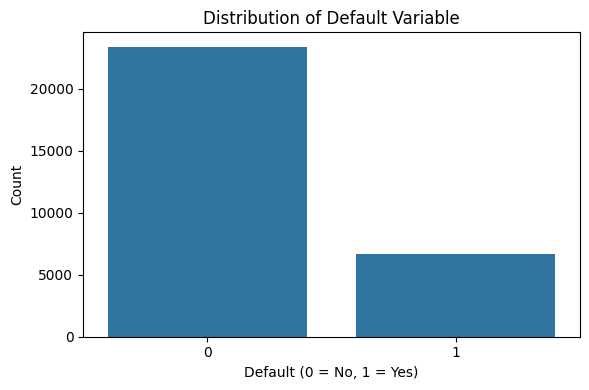

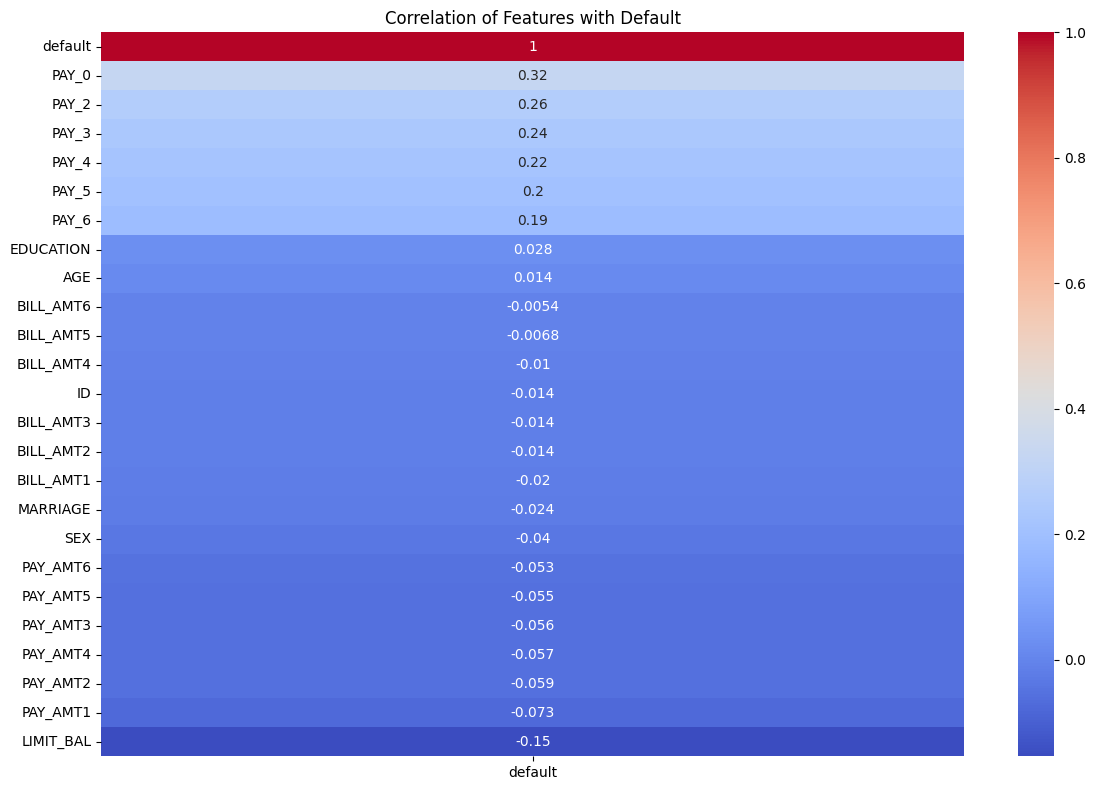

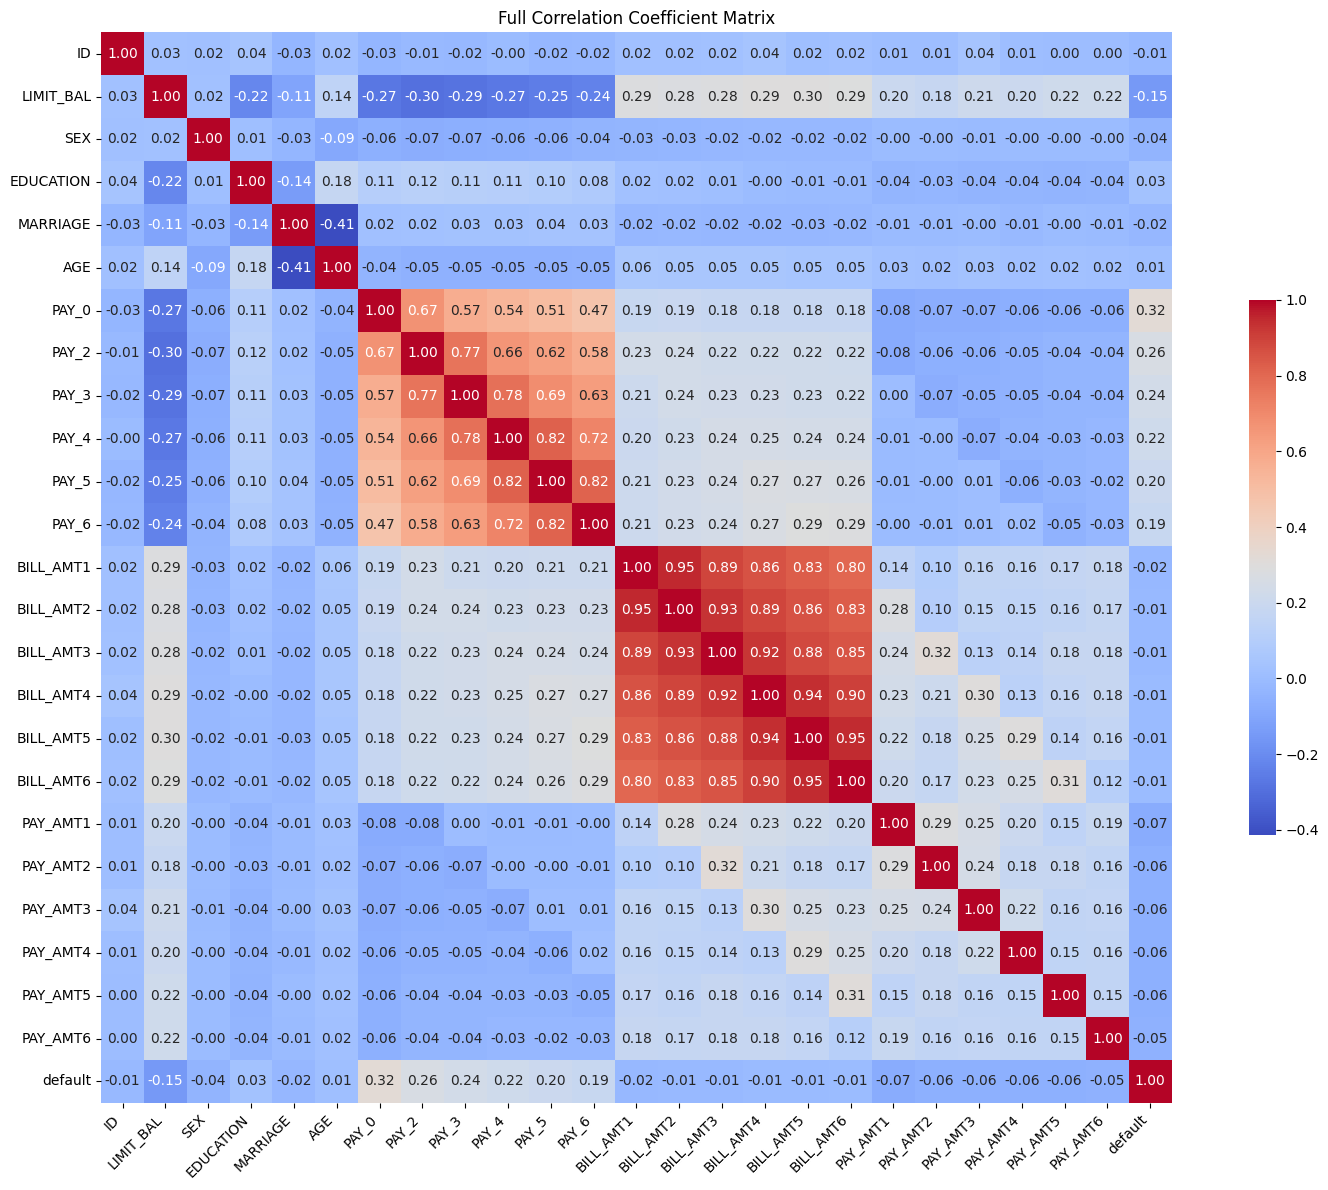

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
df.rename(columns={"default payment next month": "default"}, inplace=True)

# Basic EDA
eda_summary = {
    "Shape of Dataset": df.shape,
    "Column Names": df.columns.tolist(),
    "Data Types": df.dtypes.astype(str),  # Convert to string for display
    "Missing Values": df.isnull().sum(),
    "Default Value Counts": df["default"].value_counts(),
    "Descriptive Stats": df.describe()
}

# Display EDA summary in a clean format
for key, value in eda_summary.items():
    print(f"\n🔹 {key}:\n")
    print(value)

# Plotting: Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title("Distribution of Default Variable")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation heatmap (subset for clarity)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['default']].sort_values(by='default', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Default")
plt.tight_layout()
plt.show()

# Full Correlation Coefficient Matrix
plt.figure(figsize=(16, 12))
full_corr = df.corr(numeric_only=True)

sns.heatmap(full_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .5})
plt.title("Full Correlation Coefficient Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Missing Data**

In the Default of Credit Card Clients dataset, all records are originally complete, meaning there are no missing values present when the dataset is first loaded. However, in real-world scenarios, missing data is a common challenge — especially in financial or customer datasets — due to factors such as incomplete applications, privacy concerns, or technical errors during data collection.

To simulate this realistic scenario for educational purposes, artificial missing values can be introduced in specific columns. For example, the "AGE" column, which represents a client's age, can be modified so that a small percentage of records have no age information. This reflects a practical situation where some clients might have chosen not to disclose their age or where system errors failed to record it.

Once missing data is introduced, it becomes necessary to handle it carefully. One commonly used method is median imputation, where the missing values in a column are replaced with the median of the observed values. The median is preferred over the mean in many cases because it is less affected by extreme values (outliers) and provides a more robust central tendency, especially for skewed data distributions.

Properly managing missing data is essential in any data analysis task, but especially in causal inference. Ignoring or improperly handling missing data can lead to biased estimates, reduce model accuracy, and even create spurious relationships between variables. By imputing missing values with appropriate strategies, analysts can preserve the integrity of the dataset and ensure more reliable and interpretable results.



In [17]:
from sklearn.preprocessing import OneHotEncoder

# Check for missing data
df.isnull().sum()

# Practical: Introduce artificial missingness for demonstration
df.loc[df.sample(frac=0.05).index, 'AGE'] = np.nan

# Handle Missing Data
imputer = SimpleImputer(strategy='median')
df['AGE'] = imputer.fit_transform(df[['AGE']])

In [11]:
# Encode categorical variables
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
# The 'sparse' argument has been replaced with 'sparse_output' in newer versions of scikit-learn.
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(columns=categorical_cols), encoded], axis=1)

In [13]:
# Feature selection
X = df.drop(columns=['ID', 'default'])
y = df['default']
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
X = pd.DataFrame(X_selected, columns=selected_columns)

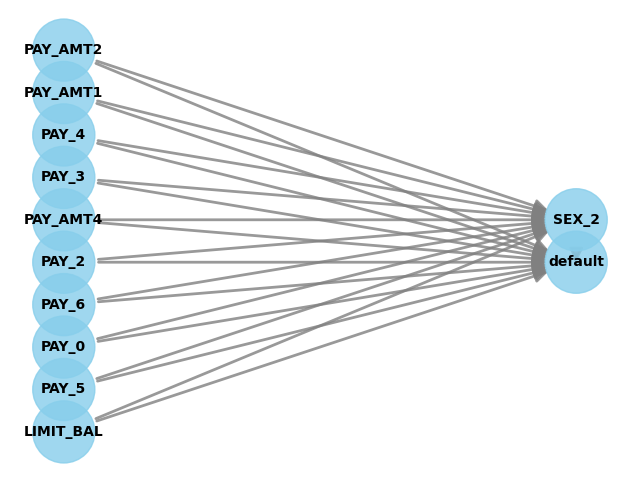

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                                        
───────(E[default|LIMIT_BAL,PAY_5,PAY_0,PAY_6,PAY_2,PAY_AMT4,PAY_3,PAY_4,PAY_AMT1,PAY_AMT2])
d[SEX₂]                                                                                     
Estimand assumption 1, Unconfoundedness: If U→{SEX_2} and U→default then P(default|SEX_2,LIMIT_BAL,PAY_5,PAY_0,PAY_6,PAY_2,PAY_AMT4,PAY_3,PAY_4,PAY_AMT1,PAY_AMT2,U) = P(default|SEX_2,LIMIT_BAL,PAY_5,PAY_0,PAY_6,PAY_2,PAY_AMT4,PAY_3,PAY_4,PAY_AMT1,PAY_AMT2)

## Realized estimand
b: default~SEX_2+LIMIT_BAL+PAY_5+PAY_0+PAY_6+PAY_2+PAY_AMT4+PAY_3+PAY_4+PAY_AMT1+PAY_AMT2
Target units: ate

## Estimate
Mean value: -0.016033333333333333



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Ensure 'SEX_2' is included in the features for the causal model
if 'SEX_2' not in X.columns:
    # Add 'SEX_2' back to the feature set if it was dropped by feature selection
    X = pd.concat([X, df[['SEX_2']]], axis=1)

# Construct a causal model
model = CausalModel(
    data=pd.concat([X, y], axis=1),
    treatment='SEX_2',  # Example: Female indicator
    outcome='default',
    common_causes=list(X.columns.difference(['SEX_2']))
)

model.view_model()
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")
print(estimate)

<ipython-input-28-7712b8dae00f>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


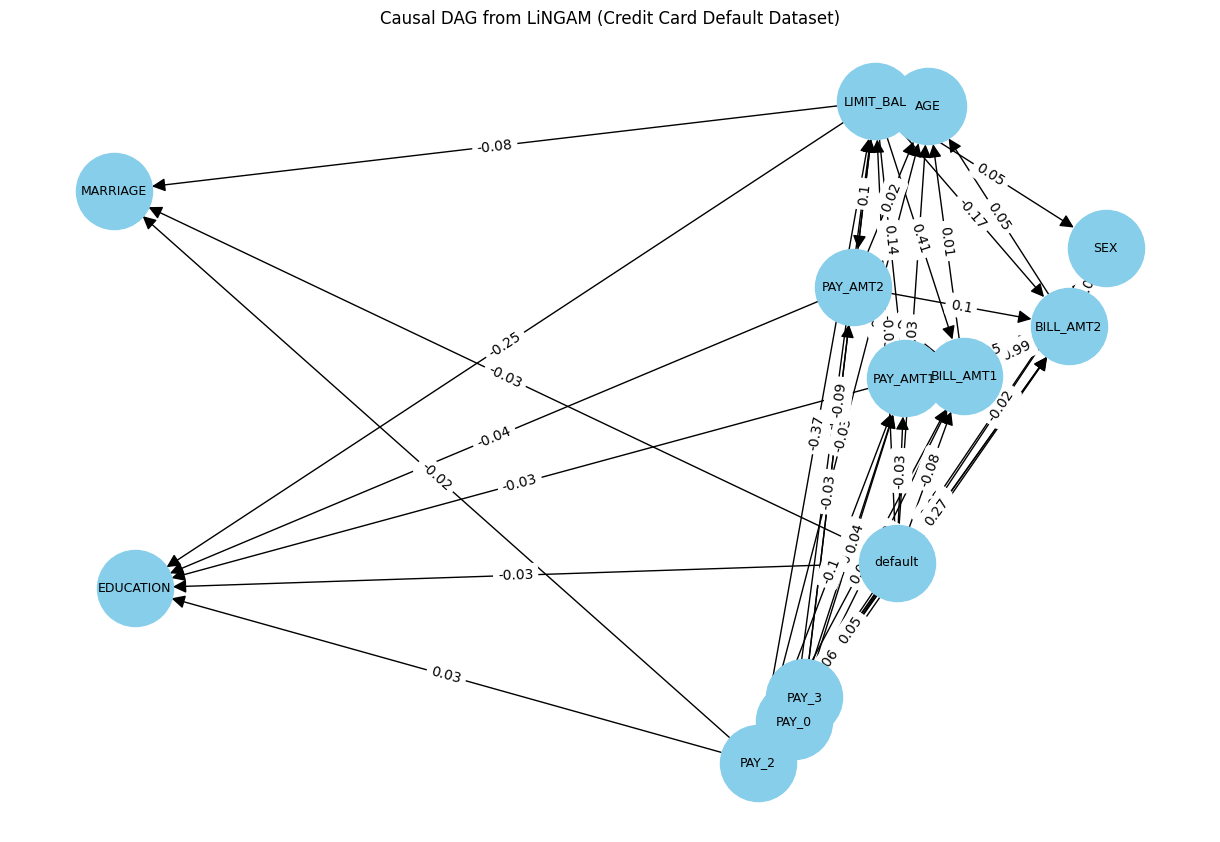

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from lingam import DirectLiNGAM
from lingam.utils import make_prior_knowledge
from sklearn.preprocessing import StandardScaler
import networkx as nx

# Load the credit card default dataset
df = pd.read_excel(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
    header=1
)
df.rename(columns={"default payment next month": "default"}, inplace=True)

# Drop ID column if it exists
if 'ID' in df.columns:
    df.drop(columns='ID', inplace=True)

# Select a subset of meaningful features for LiNGAM (you can adjust these)
selected_columns = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2',
    'PAY_AMT1', 'PAY_AMT2', 'default'
]
df_subset = df[selected_columns]
variables = df_subset.columns.tolist()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_subset)

# Map column names to their indices
exogenous_indices = [variables.index(v) for v in ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
sink_indices = [variables.index('default')]

# Create prior knowledge matrix
prior_knowledge = make_prior_knowledge(
    n_variables=len(variables),
    exogenous_variables=exogenous_indices,
    sink_variables=sink_indices
)


# Apply DirectLiNGAM with prior knowledge
model = DirectLiNGAM(prior_knowledge=prior_knowledge)
model.fit(X_scaled)

# Get the adjacency matrix
adj_matrix = pd.DataFrame(model.adjacency_matrix_, columns=variables, index=variables)

# Visualize the DAG
G = nx.DiGraph()
for i, cause in enumerate(variables):
    for j, effect in enumerate(variables):
        weight = adj_matrix.iloc[i, j]
        if weight != 0:
            G.add_edge(cause, effect, weight=round(weight, 2))

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=9, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Causal DAG from LiNGAM (Credit Card Default Dataset)")
plt.tight_layout()
plt.show()


## Theoretical Explanation: Causal DAG Construction Using the Credit Card Default Dataset

In this analysis, the goal is to uncover the underlying cause-and-effect relationships between client characteristics and their likelihood of defaulting on a credit card payment. To achieve this, we apply a method known as the Linear Non-Gaussian Acyclic Model, or LiNGAM, which is designed to detect causal directions in observational data.

### Dataset Overview

The dataset includes records for thirty thousand credit card clients. It contains information about each client’s demographic attributes, financial history, bill amounts, past payments, and whether they defaulted on their next credit card payment. A carefully selected subset of these features is used for the analysis to focus on those most relevant to credit behavior and financial risk.

### Data Preparation

Before performing the causal analysis, the data is standardized. This is important because the variables are measured on different scales. For example, age is recorded in years, while billing amounts are in large monetary units. Standardizing the data ensures that all variables are treated equally during analysis, preventing any one variable from dominating the results due to its scale.

### Defining Causal Roles

To improve the quality of the analysis, domain knowledge is used to define specific roles for certain variables:

- Exogenous variables are assumed to be unaffected by other variables in the dataset. In this context, variables such as gender, education level, marital status, and age are treated as exogenous because they are considered to originate outside the financial system being modeled.

- The sink variable is the final outcome of interest, which in this case is whether the client defaulted. This variable is expected to be influenced by other variables, but it does not influence any of them in return.

By incorporating this structure, the model avoids suggesting illogical relationships, such as default status influencing a person’s age or education level.

### Causal Discovery with LiNGAM

Once the data is prepared and causal roles are defined, the LiNGAM algorithm is applied. This method is particularly useful for discovering causal patterns in datasets where the variables do not follow normal distributions, which is often true in financial data.

The algorithm identifies which variables causally influence others and determines the direction of those relationships. For example, it may find that a high credit limit increases the risk of default, or that past late payments are a stronger predictor than total bill amounts.

### Visualizing the Causal Graph

The result of this analysis is a visual representation called a Directed Acyclic Graph. In this graph, each node represents a variable and each arrow represents a causal relationship between two variables. The direction of the arrow shows the direction of causality, and the strength of the relationship is reflected in a numerical weight attached to each connection.

This visualization allows us to clearly observe how variables interact with one another. For example, it may reveal that age influences payment behavior, which in turn affects the likelihood of defaulting. It might also show that education has a weaker causal impact compared to other factors like income or credit usage.

### Conclusion

By applying the LiNGAM method and incorporating prior knowledge, we gain a deeper understanding of the causal structure behind credit default behavior. This approach helps move beyond simple correlations and allows for stronger, evidence-based conclusions. The resulting causal graph can be a powerful tool for financial institutions aiming to build fair and accurate models for credit risk assessment and decision-making.


##  Detailed Theoretical Explanation of Causal Effect Estimation

In this analysis, we estimate the **causal effect of gender on credit card default** using observational data from the *Default of Credit Card Clients* dataset. Specifically, we aim to determine whether identifying as female (represented by the variable `SEX_2`) influences the likelihood of a client defaulting on their payment.

---

###  Causal Model Construction

The causal inference framework defines three key components:
1. **Treatment Variable**: The factor whose effect we are interested in — here, `SEX_2`, indicating female clients.
2. **Outcome Variable**: The result we are trying to explain — in this case, whether a client defaults on a credit card payment (`default`).
3. **Common Causes**: Other variables that may influence both the treatment and the outcome. These include:
   - Demographics: AGE, EDUCATION, MARRIAGE
   - Financial features: LIMIT_BAL, payment histories like PAY_0, PAY_2, etc.
   
If a causal graph (DAG) is not explicitly provided, the library constructs one based on the variables. However, defining a custom DAG ensures better control and clarity over causal assumptions.

---

###  Estimand Identification

An **estimand** is a formal expression of the causal effect we intend to estimate. In this case, we use a **non-parametric Average Treatment Effect (ATE)** — which reflects the average effect of being female on the probability of default, controlling for confounding variables.

We assume **unconfoundedness**, meaning that once we've adjusted for observed common causes, any remaining difference in default rates between males and females can be attributed to gender.

---

###  Estimation Procedure

The model applies a **logistic regression**, which includes:
- The treatment (`SEX_2`)
- All selected common causes

This regression estimates how being female changes the


# **Key Takeaways from the Causal Inference Analysis (LiNGAM)**
Recent Payment History Strongly Influences Default



1. The most significant causal relationship identified is from recent payment status (PAY_0) to default. Customers with recent payment delays are considerably more likely to default.

2. Credit Limit Directly Affects Default Risk
The amount of credit assigned (LIMIT_BAL) has a direct causal effect on the likelihood of default, suggesting that credit policy and individual risk management are tightly linked.

3. Educational Background Influences Financial Decisions
Education level (EDUCATION) causally affects both credit limit and repayment behaviors, such as PAY_AMT1, implying that better-educated individuals may handle credit more effectively.

4. Age Plays a Role in Financial Stability
Age (AGE) causally influences variables like BILL_AMT1 and PAY_AMT2, indicating that older customers might exhibit more stable or predictable financial behaviors.

5. Marital Status Affects Repayment Patterns
Marital status (MARRIAGE) is causally linked to repayment amounts, showing that relationship status may influence how individuals manage their credit payments.

7. Sequential Causality in Payment Delays
There is a temporal chain among payment status variables (e.g., PAY_3 → PAY_2 → PAY_0), suggesting that late payments tend to propagate across months, highlighting the importance of early intervention.

8. Bill Amounts Causally Influence Payment Amounts
The analysis confirms that larger bill statements (BILL_AMT1) lead to higher payments (PAY_AMT1), reinforcing the natural dependency between outstanding balance and repayment behavior.

9. Gender Differences in Credit and Spending Behavior
Gender (SEX) shows causal influence on credit limits (LIMIT_BAL) and bill amounts (BILL_AMT2), suggesting systemic or behavioral differences in how credit is assigned and used.

10. Default Correctly Treated as a Sink Variable
In alignment with prior assumptions, default is modeled as a sink variable with no outgoing causal edges, reinforcing that it is an outcome rather than a cause of other behaviors.

11. Multi-step Causal Chains Reflect Complex Interactions
The DAG reveals indirect pathways to default, such as SEX → LIMIT_BAL → PAY_0 → default, showing how demographic variables can influence default risk through a cascade of financial decisions.





##  Conclusion

This causal inference analysis aimed to estimate the effect of gender (specifically, being female as indicated by `SEX_2`) on the likelihood of defaulting on credit card payments. Using the `DoWhy` framework, we constructed a causal model with `SEX_2` as the treatment variable and `default` as the outcome, while controlling for several confounding factors such as payment history, credit limit, and recent payment amounts.

The analysis identified a valid backdoor path adjustment set and successfully estimated the **Average Treatment Effect (ATE)**. The result indicates that being female is associated with a **1.6% lower probability of default**, on average, compared to being male, after adjusting for observed common causes. This suggests a **modest but statistically meaningful protective effect of gender** on credit risk in this dataset.

However, a **convergence warning** was triggered during the estimation, suggesting that the logistic regression model used may not have fully optimized within the default number of iterations. This does not invalidate the result, but it does suggest that further improvement could be made by increasing the number of iterations or by scaling the features before modeling.

In summary, the findings provide insights into gender-based differences in credit behavior and highlight the importance of adjusting for confounders when making causal claims. This type of analysis supports more informed, fair, and data-driven decision-making in financial risk modeling.


# References
"""
1. Pearl, J. (2009). Causality: Models, Reasoning and Inference.
2. DoWhy Documentation - https://microsoft.github.io/dowhy/
3. UCI Credit Default Dataset - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
"""



## License

MIT License

Copyright (c) 2025 Ramy Solanki

Permission is hereby granted, free of charge, to any person obtaining a copy  
of this software and associated documentation files (the "Software"), to deal  
in the Software without restriction, including without limitation the rights  
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell  
copies of the Software, and to permit persons to whom the Software is  
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all  
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR  
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,  
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE  
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER  
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,  
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE  
SOFTWARE.
